In [1]:
### Bibliotecas a serem instaladas no conda
#conda install opencv=3.4.2
#conda install jupyter
#conda install matplotlib
#conda install pillow

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image

In [ ]:
#Fazendo upload da imagem

from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

In [ ]:
#Abrindo imagem
file_name = list(uploaded)[0]

img = Image.open(BytesIO(uploaded[file_name]))
img = np.asarray(img)

print(img.shape)

#Conversão de uma imagem para outro sistema de cores
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Visualização de Imagem individual
plt.figure(figsize=(5,5)); plt.title("img_gray"); fig = plt.imshow(img_gray, 'gray')

(1342, 1600, 3)


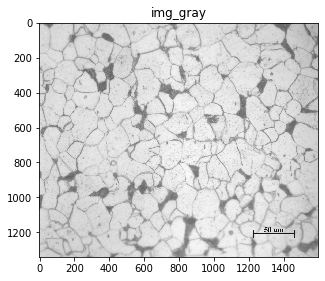

In [3]:
#Abrindo Imagem
img = plt.imread('data/aço 1010 50x - corrigido (1).jpg')
#img = plt.imread('data/Alu b.jpg')
print(img.shape)

#Conversão de uma imagem para outro sistema de cores
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#Visualização de Imagem individual
plt.figure(figsize=(5,5)); plt.title("img_gray"); fig = plt.imshow(img_gray, 'gray')

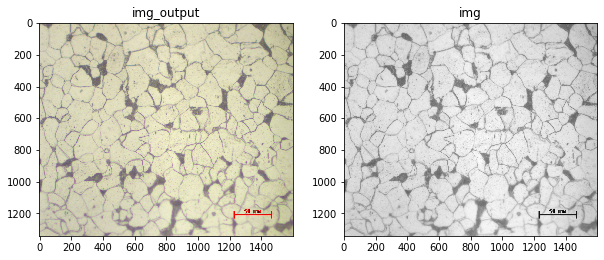

In [4]:
#Visualização de várias imagens
   #plt.subplot(#linhas #colunas linha coluna)
plt.figure(figsize= (10,10))
plt.subplot(121); plt.title('img_output'); fig=plt.imshow(img, 'gray')
plt.subplot(122); plt.title('img'); fig=plt.imshow(img_gray, 'gray')

dtype= uint8


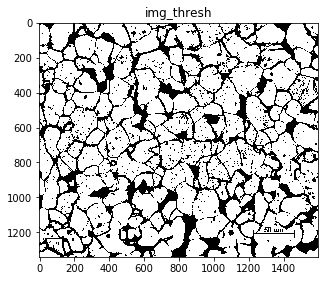

In [5]:
#Adaptivo
img_thresh = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 199, 3) 
print("dtype=", img_thresh.dtype)
plt.figure(figsize=(5,5)); plt.title("img_thresh"); fig = plt.imshow(img_thresh, 'gray')

dtype= uint8


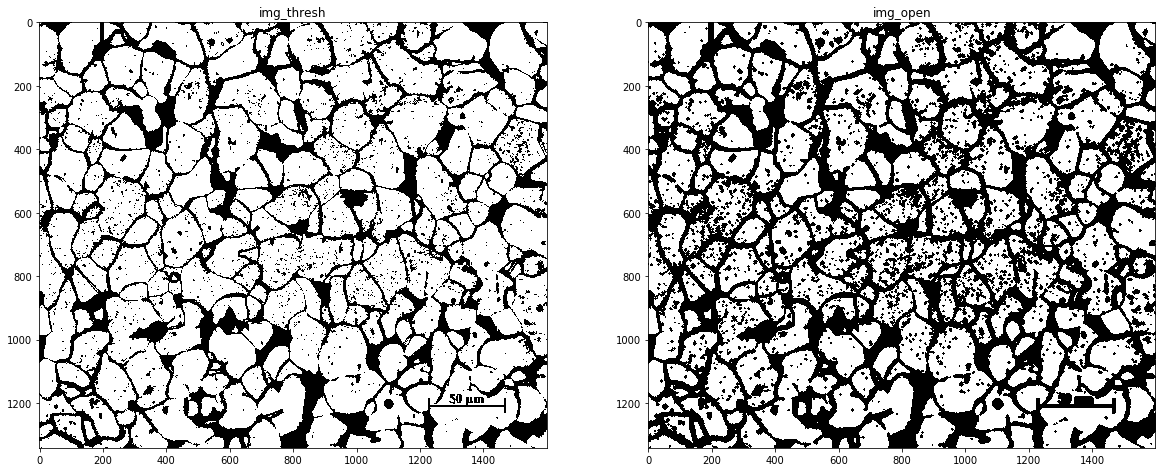

In [6]:
#Fechamento
def getCircle(n):
    '''kernel has size NxN'''
    # xx and yy are 200x200 tables containing the x and y coordinates as values
    # mgrid is a mesh creation helper
    xx, yy = np.mgrid[:n,:n]
    # circles contains the squared distance to the (100, 100) point
    # we are just using the circle equation learnt at school
    circle = (xx - np.floor(n/2)) ** 2 + (yy - np.floor(n/2)) ** 2
    circle = circle<=np.max(circle)*.5
    circle = np.uint8(circle)
    return circle

kernel = getCircle(3)
img_open = cv2.morphologyEx(img_thresh,cv2.MORPH_CLOSE,kernel, iterations = 0)
img_open = cv2.erode(img_open, kernel, iterations=3)
print("dtype=", img_open.dtype)

plt.figure(figsize= (20,20))
plt.subplot(121); plt.title('img_thresh'); fig=plt.imshow(img_thresh, 'gray')
plt.subplot(122); plt.title('img_open'); fig=plt.imshow(img_open, 'gray')

uint8


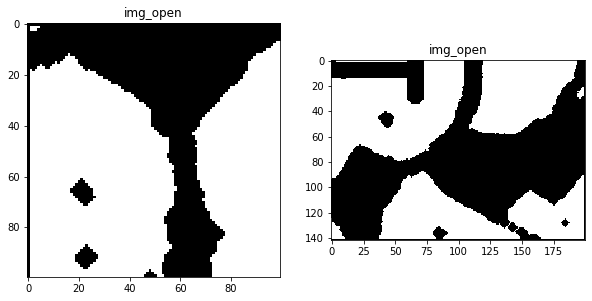

In [7]:
#Desenhando borda na imagem
y,x = img_open.shape
print(img_open.dtype)
color = 0
img_open[:,   0] = 0; img_open[:, x-1] = 0; img_open[0,   :] = 0; img_open[y-1, :] = 0

plt.figure(figsize= (10,10))
plt.subplot(121); plt.title('img_open'); fig = plt.imshow(img_open[:100,:100], 'gray')
plt.subplot(122); plt.title('img_open'); fig = plt.imshow(img_open[1200:,1400:], 'gray')

n_contours_before = 449
n_contours_after = 237


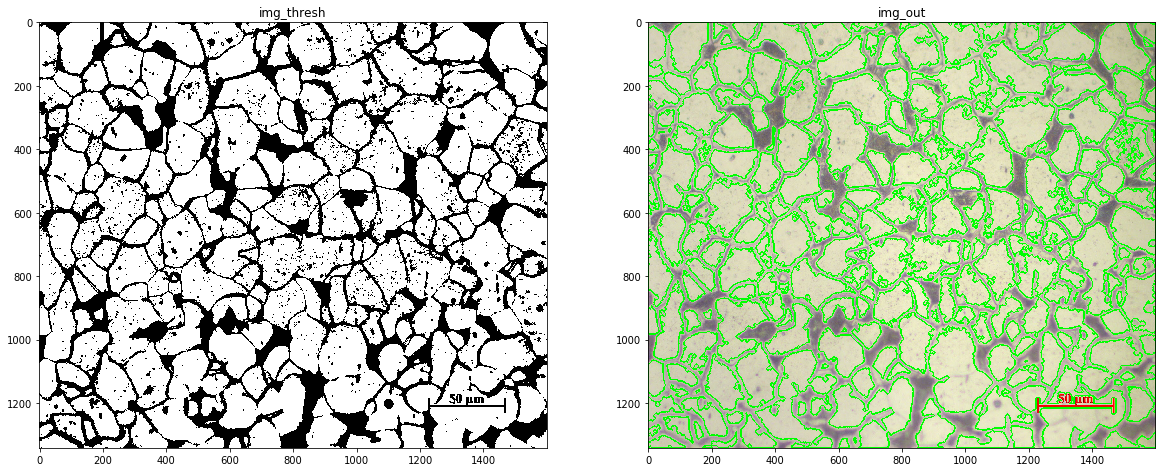

In [8]:
#Gerando Lista de Contornos
_, contours, _= cv2.findContours(img_open,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#Ordenando Lista de Contornos de acordo com a área
contours = sorted(contours, key = cv2.contourArea, reverse = True)
print("n_contours_before =", len(contours))

#Selecionando apenas contornos cuja área é maior que algum valor
min_area = 20.0
contours = [c for c in contours if cv2.contourArea(c)>min_area]
print("n_contours_after =", len(contours))

#Desenhando Contornos na imagem original
verde = (0,255,0)
img_out = cv2.drawContours(img.copy(), contours, -1, verde, 3)

plt.figure(figsize= (20,20))
plt.subplot(121); plt.title('img_thresh'); fig=plt.imshow(img_thresh, 'gray')
plt.subplot(122); plt.title('img_out'); fig=plt.imshow(img_out, 'gray')

55


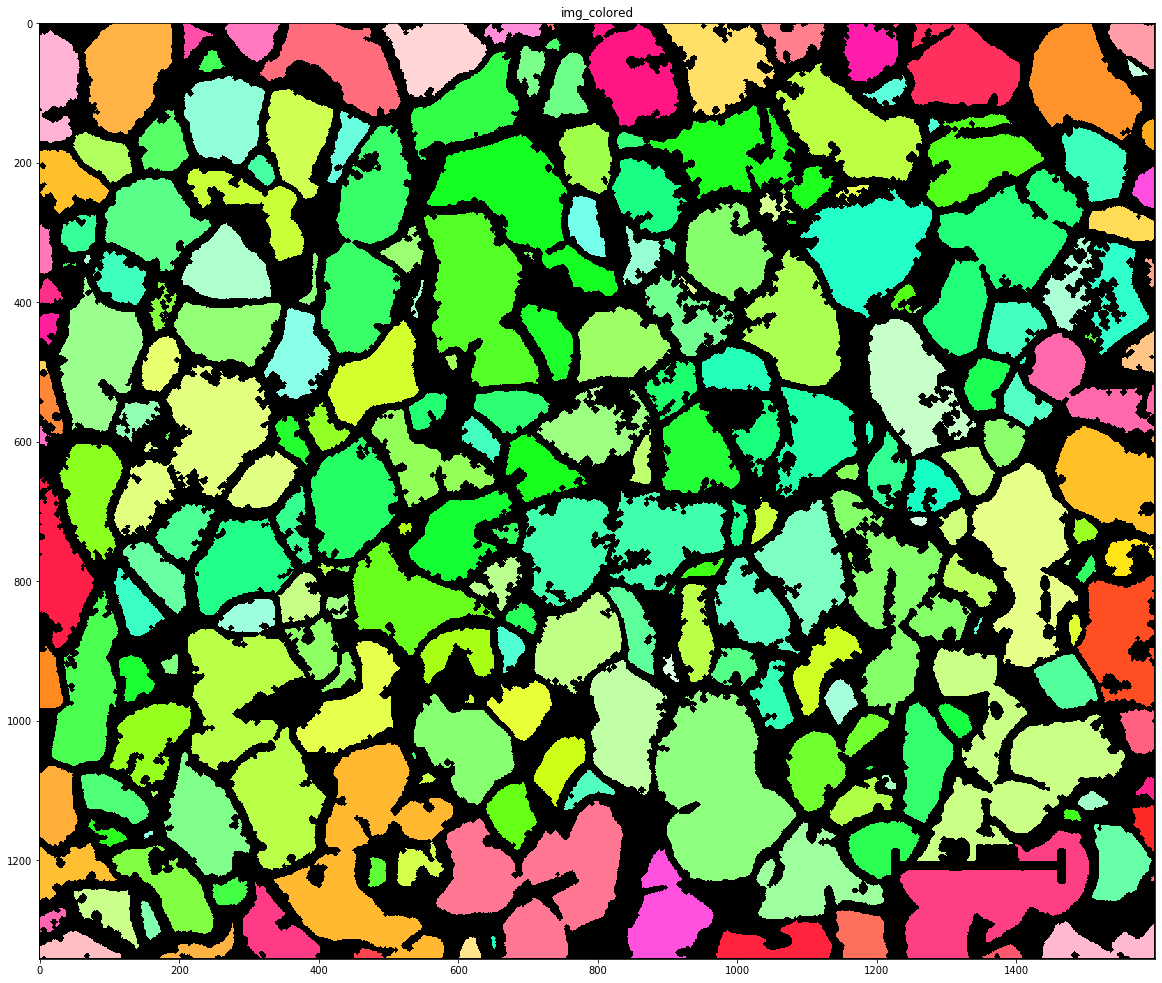

In [20]:
faixa = 3
n_borda = 0
img_colored = np.int32(np.ones(img.shape))
red = [0,255,0]
blue = [255,0,0]
for c in contours:
    (x_ini,y_ini,w,h) = cv2.boundingRect(c)
    x_end = x_ini+w; y_end = y_ini+h
    y_img, x_img = img_thresh.shape
    
    if 0<x_ini<faixa or 0<y_ini<faixa or x_img-faixa<x_end<x_img or y_img-faixa<y_end<y_img:
        n_borda +=1
        random_red = [np.random.randint(20, 235) for i in range(3)]
        random_red[0] = 255
        img_colored = cv2.fillPoly(img_colored, [c], random_red)
    else:
        random_blue = [np.random.randint(20, 235) for i in range(3)]
        random_blue[1] = 255
        img_colored = cv2.fillPoly(img_colored, [c], random_blue)
print(n_borda)
plt.figure(figsize=(20,20)); plt.title("img_colored"); fig = plt.imshow(img_colored, 'gray')

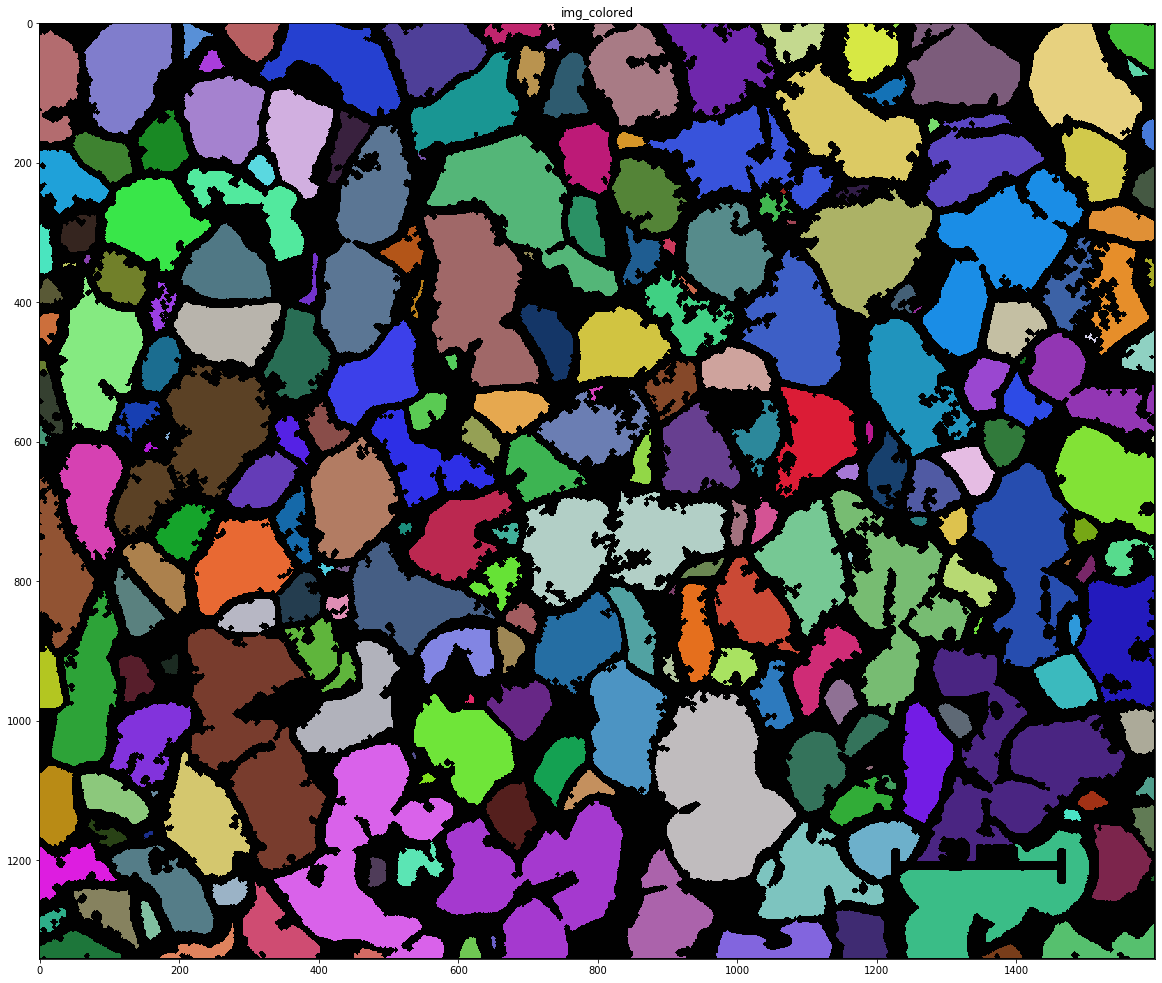

In [10]:
#Preenchendo contornos
img_colored = np.int32(np.ones(img.shape))
img_out = img.copy()
for c in contours:
    random_color = [np.random.randint(20, 235) for i in range(3)]
    img_colored = cv2.fillPoly(img_colored, [c], random_color)
    img_out = cv2.drawContours(img_out, [c], -1, random_color, 3)
    
plt.figure(figsize=(20,20)); plt.title("img_colored"); fig = plt.imshow(img_colored, 'gray')

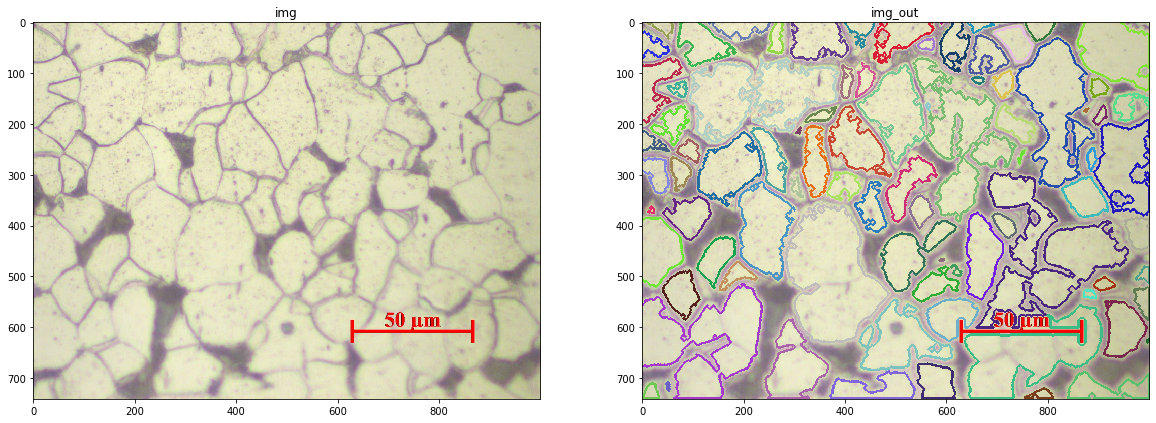

In [11]:
#Visualizando novamente
plt.figure(figsize= (20,20))
plt.subplot(121); plt.title('img'); fig=plt.imshow(img[600:,600:], 'gray')
plt.subplot(122); plt.title('img_out'); fig=plt.imshow(img_out[600:,600:], 'gray')

In [23]:
print("n_contours=", len(contours))
print("n_borda=", n_borda)
resultado = len(contours)-round(n_borda/2)
print("resultado=", resultado)

n_contours= 237
n_borda= 55
resultado= 209


In [25]:
n_real = 219
print("n_real=", n_real)
erro = abs(n_real-resultado)
print("erro=", erro)

n_real= 219
erro= 10
